In [1]:
import numpy as np
import string
import re
import random
from copy import copy
from string import ascii_lowercase, ascii_uppercase

import matplotlib.pyplot as plt

from typing import List

In [2]:
def preprocess_mess(message):
    space_pattern = re.compile(r'\s+')
    message = re.sub(space_pattern, '', message)
    
    translator = str.maketrans('', '', string.punctuation + '—')
    message = message.translate(translator)
    return message.lower()

In [3]:
def equal_chars_num(message, true_message):
    assert len(message) == len(true_message)
    return sum([1 if c1 == c2 else 0 for c1, c2 in zip(message, true_message)])

def apply_mapping(text, mapping):
    result = []
    for c in text:
        result.append(mapping[c])
    return ''.join(result)

In [4]:
def log_protocol(protocol, message, name):
    cipher = protocol.encode(message)
    decoded = protocol.decode(cipher)

    print(f'{name} cipher. Key = {protocol.key}')

    print('\nMessage:')
    print(message)

    print('\nCipher:')
    print(cipher)

    print('\nDecoded:')
    print(decoded)

In [176]:
raw_message = """Hereupon Legrand arose, with a grave and stately air, and brought me the beetle
from a glass case in which it was enclosed. It was a beautiful scarabaeus, and, at
that time, unknown to naturalists—of course a great prize in a scientific point
of view. There were two round black spots near one extremity of the back, and a
long one near the other. The scales were exceedingly hard and glossy, with all the
appearance of burnished gold. The weight of the insect was very remarkable, and,
taking all things into consideration, I could hardly blame Jupiter for his opinion
respecting it.
"""

In [177]:
raw_message

'Hereupon Legrand arose, with a grave and stately air, and brought me the beetle\nfrom a glass case in which it was enclosed. It was a beautiful scarabaeus, and, at\nthat time, unknown to naturalists—of course a great prize in a scientific point\nof view. There were two round black spots near one extremity of the back, and a\nlong one near the other. The scales were exceedingly hard and glossy, with all the\nappearance of burnished gold. The weight of the insect was very remarkable, and,\ntaking all things into consideration, I could hardly blame Jupiter for his opinion\nrespecting it.\n'

In [6]:
message = preprocess_mess(raw_message)
message

'hereuponlegrandarosewithagraveandstatelyairandbroughtmethebeetlefromaglasscaseinwhichitwasencloseditwasabeautifulscarabaeusandatthattimeunknowntonaturalistsofcourseagreatprizeinascientificpointofviewthereweretworoundblackspotsnearoneextremityofthebackandalongoneneartheotherthescaleswereexceedinglyhardandglossywithalltheappearanceofburnishedgoldtheweightoftheinsectwasveryremarkableandtakingallthingsintoconsiderationicouldhardlyblamejupiterforhisopinionrespectingit'

In [7]:
class CaesarCipherProtocol:
    def __init__(self):
        self.key = random.randint(0, len(ascii_lowercase))
        
    def encode(self, message):
        mapping = { c: (2 * ascii_lowercase)[i + self.key] for i, c in enumerate(ascii_lowercase) }
        return apply_mapping(message, mapping).upper()
    
    def decode(self, cipher):
        mapping = { (2 * ascii_lowercase)[i + self.key]: c for i, c in enumerate(ascii_lowercase) }
        return apply_mapping(cipher.lower(), mapping)

In [8]:
log_protocol(protocol=CaesarCipherProtocol(), message=message, name='Caesar')

Caesar cipher. Key = 13

Message:
hereuponlegrandarosewithagraveandstatelyairandbroughtmethebeetlefromaglasscaseinwhichitwasencloseditwasabeautifulscarabaeusandatthattimeunknowntonaturalistsofcourseagreatprizeinascientificpointofviewthereweretworoundblackspotsnearoneextremityofthebackandalongoneneartheotherthescaleswereexceedinglyhardandglossywithalltheappearanceofburnishedgoldtheweightoftheinsectwasveryremarkableandtakingallthingsintoconsiderationicouldhardlyblamejupiterforhisopinionrespectingit

Cipher:
URERHCBAYRTENAQNEBFRJVGUNTENIRNAQFGNGRYLNVENAQOEBHTUGZRGURORRGYRSEBZNTYNFFPNFRVAJUVPUVGJNFRAPYBFRQVGJNFNORNHGVSHYFPNENONRHFNAQNGGUNGGVZRHAXABJAGBANGHENYVFGFBSPBHEFRNTERNGCEVMRVANFPVRAGVSVPCBVAGBSIVRJGURERJRERGJBEBHAQOYNPXFCBGFARNEBARRKGERZVGLBSGURONPXNAQNYBATBARARNEGURBGUREGURFPNYRFJRERRKPRRQVATYLUNEQNAQTYBFFLJVGUNYYGURNCCRNENAPRBSOHEAVFURQTBYQGURJRVTUGBSGURVAFRPGJNFIRELERZNEXNOYRNAQGNXVATNYYGUVATFVAGBPBAFVQRENGVBAVPBHYQUNEQYLOYNZRWHCVGRESBEUVFBCVAVBAERFCRPGVATVG

Decoded:
hereuponleg

In [9]:
def attack_caesar_cipher(message, cipher):
    tries = 0
    keys = list(range(len(ascii_uppercase)))
    random.shuffle(keys)
    
    for key in keys:
        tries += 1
        mapping = { (2 * ascii_uppercase)[i + key]: c for i, c in enumerate(ascii_uppercase) }
        
        current_message = apply_mapping(cipher, mapping).lower()
        if current_message == message:
            print('Attack successful.')
            print(f'Tries: {tries}')

In [10]:
protocol= CaesarCipherProtocol()
cipher = protocol.encode(message)
attack_caesar_cipher(message, cipher=cipher)

Attack successful.
Tries: 14


In [11]:
class SubstitutionCipherProtocol:
    def __init__(self):
        letters = list(ascii_lowercase)
        random.shuffle(letters)
        self.key = ''.join(letters)
        
    def encode(self, message):
        mapping = { c1: c2 for c1, c2 in zip(ascii_lowercase, self.key) }
        return apply_mapping(message, mapping).upper()
    
    def decode(self, cipher):
        mapping = { c2: c1 for c1, c2 in zip(ascii_lowercase, self.key) }
        return apply_mapping(cipher.lower(), mapping)

In [12]:
log_protocol(protocol=SubstitutionCipherProtocol(), message=message, name='Substitution')

Substitution cipher. Key = ekbaloxjfundryzhitcqvwsgmp

Message:
hereuponlegrandarosewithagraveandstatelyairandbroughtmethebeetlefromaglasscaseinwhichitwasencloseditwasabeautifulscarabaeusandatthattimeunknowntonaturalistsofcourseagreatprizeinascientificpointofviewthereweretworoundblackspotsnearoneextremityofthebackandalongoneneartheotherthescaleswereexceedinglyhardandglossywithalltheappearanceofburnishedgoldtheweightoftheinsectwasveryremarkableandtakingallthingsintoconsiderationicouldhardlyblamejupiterforhisopinionrespectingit

Cipher:
JLTLVHZYDLXTEYAETZCLSFQJEXTEWLEYACQEQLDMEFTEYAKTZVXJQRLQJLKLLQDLOTZREXDECCBECLFYSJFBJFQSECLYBDZCLAFQSECEKLEVQFOVDCBETEKELVCEYAEQQJEQQFRLVYNYZSYQZYEQVTEDFCQCZOBZVTCLEXTLEQHTFPLFYECBFLYQFOFBHZFYQZOWFLSQJLTLSLTLQSZTZVYAKDEBNCHZQCYLETZYLLGQTLRFQMZOQJLKEBNEYAEDZYXZYLYLETQJLZQJLTQJLCBEDLCSLTLLGBLLAFYXDMJETAEYAXDZCCMSFQJEDDQJLEHHLETEYBLZOKVTYFCJLAXZDAQJLSLFXJQZOQJLFYCLBQSECWLTMTLRETNEKDLEYAQENFYXEDDQJFYXCFYQZBZYCFALTEQFZYFBZVDAJETADMKDERLUVHFQLTOZTJFCZHFYFZYTLCH

In [13]:
from collections import Counter
def draw_frequency(text: str) -> str:
    counts = list(sorted(Counter(text).items(), key=lambda x: x[0]))
    labels = [c[0] for c in counts]
    values = [c[1] for c in counts]
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels)
    plt.show()

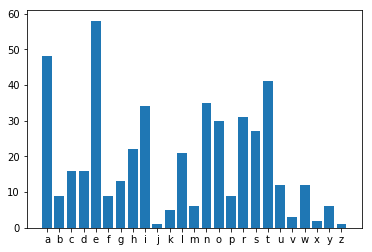

In [14]:
draw_frequency(message)

In [15]:
random.seed(1)
protocol = SubstitutionCipherProtocol()
cipher = protocol.encode(message)

In [16]:
cipher

'ZWMWPVHARWFMXAKXMHUWITOZXFMXDWXAKUOXOWRSXTMXAKYMHPFZOQWOZWYWWORWBMHQXFRXUULXUWTAIZTLZTOIXUWALRHUWKTOIXUXYWXPOTBPRULXMXYXWPUXAKXOOZXOOTQWPAJAHIAOHAXOPMXRTUOUHBLHPMUWXFMWXOVMTEWTAXULTWAOTBTLVHTAOHBDTWIOZWMWIWMWOIHMHPAKYRXLJUVHOUAWXMHAWWCOMWQTOSHBOZWYXLJXAKXRHAFHAWAWXMOZWHOZWMOZWULXRWUIWMWWCLWWKTAFRSZXMKXAKFRHUUSITOZXRROZWXVVWXMXALWHBYPMATUZWKFHRKOZWIWTFZOHBOZWTAUWLOIXUDWMSMWQXMJXYRWXAKOXJTAFXRROZTAFUTAOHLHAUTKWMXOTHATLHPRKZXMKRSYRXQWNPVTOWMBHMZTUHVTATHAMWUVWLOTAFTO'

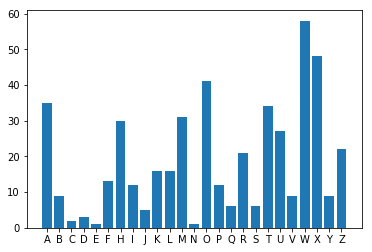

In [17]:
draw_frequency(cipher)

In [37]:
def vigenere_table() -> List[List[str]]:
    letters = list(ascii_lowercase)
    table = []
    for i in range(len(ascii_lowercase)):
        table.append(letters)
        letters = letters[1:] + [letters[0]]
    return table

def decode_vigenere(cipher: str, word: str) -> str:
    cipher = cipher.lower()
    table = vigenere_table()
    code_word = [word[i % len(word)] for i in range(len(cipher))]

    result = []
    for cipher_char, code_char in zip(cipher, code_word):
        id_code = ord(code_char) - ord('a')

        for i in range(len(ascii_lowercase)):
            if table[id_code][i] == cipher_char:
                result.append(chr(ord('a') + i))
    return ''.join(result)


class VigenereCipherProtocol:
    def __init__(self, key):
        self.word = key
        self.key = self.word
            
    def encode(self, message: str) -> str:
        table = vigenere_table()
        code_word = [self.word[i % len(self.word)] for i in range(len(message))]
        
        result = []
        for mes_char, code_char in zip(message, code_word):
            id_mes = ord(mes_char) - ord('a')
            id_code = ord(code_char) - ord('a')
            
            result.append(table[id_code][id_mes])
            
        return ''.join(result).upper()  
    
    def decode(self, cipher: str) -> str:
        return decode_vigenere(cipher, self.word)

In [397]:
secret_key = 'prometeus'

In [398]:
table = vigenere_table()
for i in range(len(table)):
    print(''.join(table[i]))

abcdefghijklmnopqrstuvwxyz
bcdefghijklmnopqrstuvwxyza
cdefghijklmnopqrstuvwxyzab
defghijklmnopqrstuvwxyzabc
efghijklmnopqrstuvwxyzabcd
fghijklmnopqrstuvwxyzabcde
ghijklmnopqrstuvwxyzabcdef
hijklmnopqrstuvwxyzabcdefg
ijklmnopqrstuvwxyzabcdefgh
jklmnopqrstuvwxyzabcdefghi
klmnopqrstuvwxyzabcdefghij
lmnopqrstuvwxyzabcdefghijk
mnopqrstuvwxyzabcdefghijkl
nopqrstuvwxyzabcdefghijklm
opqrstuvwxyzabcdefghijklmn
pqrstuvwxyzabcdefghijklmno
qrstuvwxyzabcdefghijklmnop
rstuvwxyzabcdefghijklmnopq
stuvwxyzabcdefghijklmnopqr
tuvwxyzabcdefghijklmnopqrs
uvwxyzabcdefghijklmnopqrst
vwxyzabcdefghijklmnopqrstu
wxyzabcdefghijklmnopqrstuv
xyzabcdefghijklmnopqrstuvw
yzabcdefghijklmnopqrstuvwx
zabcdefghijklmnopqrstuvwxy


In [399]:
log_protocol(protocol=VigenereCipherProtocol(secret_key), message=message, name='Vigenere')

Vigenere cipher. Key = prometeus

Message:
hereuponlegrandarosewithagraveandstatelyairandbroughtmethebeetlefromaglasscaseinwhichitwasencloseditwasabeautifulscarabaeusandatthattimeunknowntonaturalistsofcourseagreatprizeinascientificpointofviewthereweretworoundblackspotsnearoneextremityofthebackandalongoneneartheotherthescaleswereexceedinglyhardandglossywithalltheappearanceofburnishedgoldtheweightoftheinsectwasveryremarkableandtakingallthingsintoconsiderationicouldhardlyblamejupiterforhisopinionrespectingit

Cipher:
WVFQYISHDTXFMRWELGHVKUXAEAJPMSMRWWNSIVZKEBVUFSSFAYZLNETKVQFXINDTWFAQTKFSHJQMWXMHOWZQTMMAUKTEQXSLIXAINOEEUIUMIZTGPLGUJPSOQYLEHVPKHTEMXCETLBWRHAHLDEOFYKEFAHKGAJVSOJHVOSVXENHGZNQMGEMUXVBFMYMWHDZBFSYZCWLKVQVXAYJTKKAVHYHVQCOOOLTILHESMVHRYWMKFQQBXSGUKVQFTGESCUOXSGKIFTESMVMLYGIYSDXAIMUPCSEAXVYWMTSQHBRADNYODHTRXYAFGECPMNZPCZFLXEJHTRFMRVIIXQLFZMLLYVVFZPXAIQWXXVFSYXBWXEGQGMAUKKVFKVXQUJZRPXITRXLPBWZKTPFLWZBSWBRNGRFBEMWILSIZCZMVSODSYODHECVDPDSVYIMNWGWCDLBWIHXEWARKIMHTTHURZMN

Decoded:
he

In [400]:
protocol = VigenereCipherProtocol(secret_key)
message = message
cipher = protocol.encode(message)

In [401]:
from collections import defaultdict
CHARS_COUNT = 4

def diffs_gcd(diffs) -> int:
    gcd_ = diffs[0]
    for d in diffs:
        gcd_ = np.gcd(gcd_, d)
    return gcd_

def get_diffs(cipher: str) -> List[int]:
    sub_strs = defaultdict(list)
    diffs = []
    for i in range(len(cipher) - CHARS_COUNT + 1):
        sub_str = cipher[i:i+CHARS_COUNT]
        if sub_str in sub_strs:
            for position in sub_strs[sub_str]:
                cur_diff = i - position
                if diffs_gcd(diffs + [cur_diff]) != 1:
                    diffs.append(cur_diff)
                    
        sub_strs[sub_str].append(i)
    return diffs

In [402]:
diffs = get_diffs(cipher)
diffs

[189, 36, 279, 126]

In [403]:
alphabet_num = diffs_gcd(diffs)
print(alphabet_num)

9


In [404]:
def split_cipher(cipher, n):
    results = [[] for i in range(n)]
    for i, c in enumerate(cipher):
        results[i % n].append(c)
    return [''.join(r) for r in results]

In [405]:
splitted = split_cipher(cipher, alphabet_num)
splitted

['WTHPISTTHWTIIPPTDHHGXDLTQHMUCTIPMNAPTQVXXKZPWRISPGXT',
 'VXVMVSKWJZENZSKLEKVZVZKKCEKKUEYCTYFCRLFXEVRBZFZYDWET',
 'FFKSZFVFQQQOTOHBOGONBBVKOSFVOSSSSOGZFFZVGFPWBBCOSCWH',
 'QMUMKAQAMTXEGQTWFASQFFQAOMQQXMDEQDEFMZPFQKXZSEZDVDAU',
 'YRXREYFQWMSEPYERYJVMMSVVOVQFSVXAHHCLRMXSGVIKWMMHYLRR',
 'IWAWBZXTXMLULLMHKVXGYYXHLHBTGMAXBTPXVLAYMXTTBWVEIBKZ',
 'SEEWVLIKMAIIGEXAESEEMZAYTRXGKLIVRRMEILIXAQRPRISCMWIM',
 'HLANUNNFHUXUUHCHFONMWCYHIYSEIYMYAXNJIYQBUUXFNLOVNIMN',
 'DGJSFEDSOKAMJVELAJHUHWJVLWGSFGUWDYZHXVWWKJLLGSDDWHH']

In [406]:
def count_freq(text: str):
    counts = list(sorted(Counter(text).items(), key=lambda x: x[0]))
    return counts

In [407]:
def top_candidates(text: str) -> List[str]:
    text = text.lower()
    table = vigenere_table()
    freqs = list(sorted(count_freq(text), key=lambda i: i[1]))[::-1]
    top_chars = [f[0] for f in freqs]
    
    result = []
    for i in range(len(table)):
        cur_char = table[i][ord('e') - ord('a')]
        if cur_char in top_chars[:2]:
            result.append(chr(ord('a') + i))
    return result

In [408]:
candidates = [top_candidates(splitted[i]) for i in range(len(splitted))]
for t in candidates:
    print(t)

['l', 'p']
['g', 'v']
['b', 'k']
['i', 'm']
['n', 'r']
['p', 't']
['a', 'e']
['j', 'q']
['f', 's']


In [409]:
from itertools import product

In [410]:
english_words = []
with open('words.txt', mode='r') as f:
    english_words = f.read().splitlines()

def count_intersections(message: str):
    intersections = 0
    for english_word in english_words:
        intersections += message.count(english_word)
    return intersections

In [411]:
english_words

['the',
 'of',
 'to',
 'and',
 'a',
 'in',
 'is',
 'it',
 'you',
 'that',
 'he',
 'was',
 'for',
 'on',
 'are',
 'with',
 'as',
 'I',
 'his',
 'they',
 'be',
 'at',
 'one',
 'have',
 'this',
 'from',
 'or',
 'had',
 'by',
 'hot',
 'word',
 'but',
 'what',
 'some',
 'we',
 'can',
 'out',
 'other',
 'were',
 'all',
 'there',
 'when',
 'up',
 'use',
 'your',
 'how',
 'said',
 'an',
 'each',
 'she',
 'which',
 'do',
 'their',
 'time',
 'if',
 'will',
 'way',
 'about',
 'many',
 'then',
 'them',
 'write',
 'would',
 'like',
 'so',
 'these',
 'her',
 'long',
 'make',
 'thing',
 'see',
 'him',
 'two',
 'has',
 'look',
 'more',
 'day',
 'could',
 'go',
 'come',
 'did',
 'number',
 'sound',
 'no',
 'most',
 'people',
 'my',
 'over',
 'know',
 'water',
 'than',
 'call',
 'first',
 'who',
 'may',
 'down',
 'side',
 'been',
 'now',
 'find',
 'any',
 'new',
 'work',
 'part',
 'take',
 'get',
 'place',
 'made',
 'live',
 'where',
 'after',
 'back',
 'little',
 'only',
 'round',
 'man',
 'year',
 'ca

In [412]:
potentital_messages = []
for word_tuple in product(*candidates):
    word = ''.join(word_tuple)
    
    potentital_message = decode_vigenere(cipher, word)
    potentital_messages.append((potentital_message, count_intersections(potentital_message), word))

In [413]:
potentital_messages = list(sorted(potentital_messages, key=lambda i: i[1]))

In [414]:
probable_msg = potentital_messages[-1]
print('secret key:', secret_key.upper())
print('supposed key:', probable_msg[2].upper())
print("result:", "SUCCESS" if secret_key == probable_msg[2] else "MISSION FAILED")
print()
print('decoded message:', probable_msg[0])

secret key: PROMETEUS
supposed key: PVBMRTEJS
result: MISSION FAILED

decoded message: haeehpoyleceaadacosajigharrarraadseatayynirlndxeohghemepueoeeelebeozagwasopafeiywhephvtwlsejplbseoitsnsnbelutesuysclraxnehsaydapghntttmeqakaowytojnthrawispfoscofrsangeeaepremevnadciaatvfinpoeatbfvtewpueeewprepjoeouydbhncxspztsjraeonpexpeezitjofpueoacvanznlbngznejraethpotdrrghedcahrsjerpexyreqinrlydnrqanoglkfslwiehahytueaapeweaacezfbqenvshpdgkydgheheicutbftseijfeptwlsvaeyeemlrkwolranotagvntalwtheagfineockasvdecatebnvcoflddnrqlymlairjhpieerbbruiszpijvoaredpeygiagie
